<a href="https://colab.research.google.com/github/MunaAmjedALetaywi/Diamond-Price-Prediction/blob/main/Diamond_Price_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diamond Price Prediction
---



---
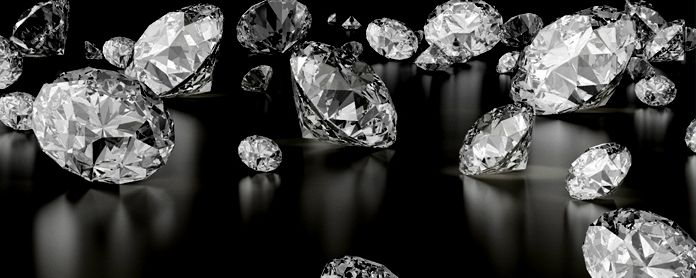


**Each row represents a single diamond and the columns provide various attributes of the diamond such as carat weight, cut, color, clarity, depth, table, and price.**

**Summary of each column:**

1. Id: an identifier for each diamond.

2. Carat: the weight of the diamond in carats.

3. Cut: the quality of the cut, with possible values including Fair, Good, Very Good, Premium, and Ideal.

4. Color: the color of the diamond, with possible values ranging from J (colorless) to D (light yellow or brown).

5. Clarity: the clarity of the diamond, with possible values ranging from IF (internally flawless) to I3 (included).

6. Depth: the depth of the diamond as a percentage of its diameter.

6. Table: the width of the top facet of the diamond as a percentage of its diameter.

8. Price: the price of the diamond in US dollars.

9. x, y, z: the length, width, and depth of the diamond in millimeters.

The dataset appears to be a mix of different cuts, colors, clarities, and carat weights, which may make it useful for analyzing the factors that influence diamond prices.

#Exploratory Data Analysis

In [3]:
# Import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
# load dataset
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [5]:
print("The Train Shap",train.shape)
print("___________________________")
print("The Test Shap",test.shape)

The Train Shap (43152, 11)
___________________________
The Test Shap (10788, 10)


In [6]:
train.sample(10)

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
1695,1696,1.07,Ideal,E,SI2,61.5,56.0,5602,6.58,6.61,4.06
16703,16704,0.40,Good,I,VVS2,59.7,62.0,750,4.75,4.79,2.85
32394,32395,1.52,Premium,G,VVS2,62.1,58.0,14105,7.40,7.31,4.57
265,266,0.34,Ideal,G,IF,62.2,56.0,984,4.45,4.46,2.77
36869,36870,1.00,Ideal,I,SI1,61.4,56.0,4200,6.45,6.39,3.94
42420,42421,0.30,Premium,F,VS2,60.6,60.0,605,4.36,4.39,2.65
30043,30044,0.31,Ideal,I,VS1,62.4,53.0,507,4.33,4.36,2.71
36341,36342,0.44,Very Good,E,SI1,63.2,53.0,970,4.87,4.84,3.07
19980,19981,0.35,Ideal,E,IF,61.4,56.0,1197,4.53,4.56,2.79
31287,31288,0.36,Ideal,E,VS2,62.8,55.0,1013,4.56,4.49,2.84


In [7]:
train.head(5)

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [8]:
test.head(5)

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [9]:
#a statistical summary of the data contained within the DataFrame or Series.
train.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


* Id: Represent an identifier for each entry in the dataset. The minimum value is 1, and the maximum value is 43152. There are 43152 entries in total.

* carat: Represents the weight of the diamonds in carats. The minimum value is 0.2, and the maximum value is 5.01. The mean is approximately 0.798, and the standard deviation is around 0.474.

* depth: Represents the depth percentage of the diamonds. The minimum depth is 43.0, and the maximum depth is 79.0. The mean depth is approximately 61.747, with a standard deviation of around 1.435.

* table: Represents the width of the top of the diamond relative to its widest point. The minimum table width is 43.0, and the maximum is 95.0. The mean table width is approximately 57.458, with a standard deviation of around 2.234.

* price: Represents the price of the diamonds. The minimum price is 326, and the maximum price is 18823. The mean price is approximately 3929.492, with a standard deviation of around 3985.528.

* x, y, z: These columns likely represent the dimensions of the diamonds. The 'x' dimension has a mean of approximately 5.732, the 'y' dimension has a mean of approximately 5.735, and the 'z' dimension has a mean of approximately 3.539. The standard deviations for 'x', 'y', and 'z' are around 1.121, 1.149, and 0.708, respectively.

In [10]:
#it provides a summary of the descriptive statistics for columns containing object or string data types in a DataFrame.
train.describe(include='O')

,cut,color,clarity
count,43152,43152,43152
unique,5,7,8
top,Ideal,G,SI1
freq,17203,9060,10428


In [11]:
#Dropo Id I don't need this column in the prediction process
train.drop('Id', axis=1, inplace=True)

In [12]:
#Information about columns to show the dataType and if there any null Nalues
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  int64  
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


In [13]:
# Sum of null values , Sum of duplicated & calculate the number of unique values in a column. 
#It returns the count of distinct or unique elements present in the column.
print("Number of null value :")
print(train.isna().sum())
print("__________________________________________________________")
print("Duplicated :",train.duplicated().sum())
print("__________________________________________________________")
print(train.nunique())

Number of null value :
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64
__________________________________________________________
Duplicated : 97
__________________________________________________________
carat        266
cut            5
color          7
clarity        8
depth        179
table        121
price      10640
x            546
y            543
z            368
dtype: int64


In [14]:
#Drop duplicate Fron train dataset.
train.drop_duplicates(inplace=True)

print("Duplicated :",train.duplicated().sum())

Duplicated : 0


In [15]:
# splitting our data into categorical and numerical
categorical_col = train[['clarity', 'color', 'cut']]
numerical_col = train[['carat', 'depth', 'table', 'x', 'y', 'z', 'price']]

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>,
        <Axes: title={'center': 'z'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >, <Axes: >]],
      dtype=object)

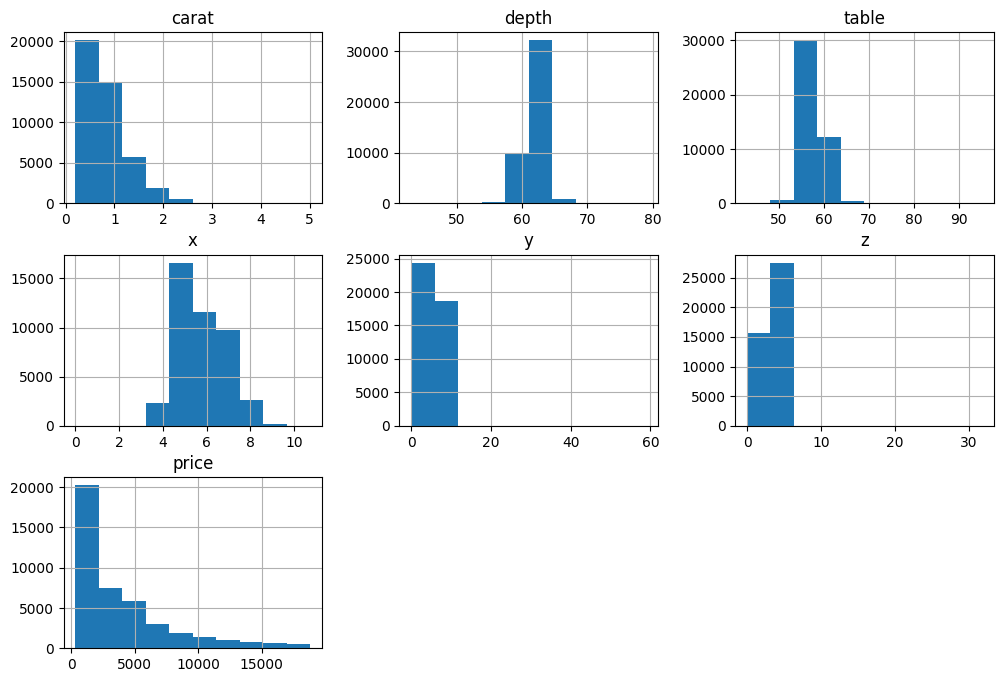

In [16]:
numerical_col.hist(figsize=(12, 8))

<Axes: xlabel='carat', ylabel='price'>

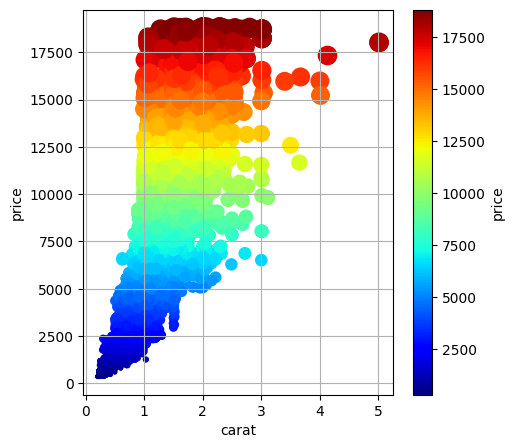

In [17]:
train.plot(kind="scatter", x="carat", y="price", grid=True, s=train["price"] / 100,  c="price", cmap="jet", colorbar=True,legend=True, sharex=False, figsize=(5, 5))

In [18]:
# replacing 0 values by their median
train['x']=train['x'].replace(0, train['x'].median())
train['y']=train['y'].replace(0, train['y'].median())
train['z']=train['z'].replace(0, train['z'].median())
train.describe()

,carat,depth,table,price,x,y,z
count,43055.000000,43055.000000,43055.000000,43055.000000,43055.000000,43055.000000,43055.000000
mean,0.797752,61.746373,57.459798,3930.016235,5.732217,5.735594,3.539922
std,0.473198,1.435066,2.234325,3984.939986,1.119029,1.147057,0.704420
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,948.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5312.500000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [19]:
# The lower_boundries and upper_boundries lists will contain the lower and upper boundaries, respectively, for each numerical column in the numerical_col DataFrame.
# These boundaries can be used to identify potential outliers in the data based on the IQR method.
lower_boundries= []
upper_boundries= []
for col in numerical_col.columns:
    IQR= numerical_col[col].quantile(0.75) - numerical_col[col].quantile(0.25)
    lower_bound= numerical_col[col].quantile(0.25) - (1.5*IQR)
    upper_bound= numerical_col[col].quantile(0.75) + (1.5*IQR)
    
    print(col, ":", lower_bound, ",",  upper_bound)
    
    lower_boundries.append(lower_bound)
    upper_boundries.append(upper_bound)

carat : -0.5599999999999999 , 2.0
depth : 58.75 , 64.75
table : 51.5 , 63.5
x : 1.9649999999999999 , 9.285
y : 1.9899999999999993 , 9.27
z : 1.2150000000000003 , 5.734999999999999
price : -5598.75 , 11859.25


* These boundaries provide a range within which the majority of the data points are expected to fall based on the IQR method. Values outside these boundaries could be considered potential outliers.

* carat: The lower boundary is approximately -0.56, and the upper boundary is 2.0. Any value below the lower boundary or above the upper boundary in the 'carat' column could be considered a potential outlier.

* depth: The lower boundary is 58.75, and the upper boundary is 64.75. Any value below 58.75 or above 64.75 in the 'depth' column could be considered a potential outlier.

* table: The lower boundary is 51.5, and the upper boundary is 63.5. Any value below 51.5 or above 63.5 in the 'table' column could be considered a potential outlier.

* x: The lower boundary is approximately 1.965, and the upper boundary is 9.285. Any value below 1.965 or above 9.285 in the 'x' column could be considered a potential outlier.

* y: The lower boundary is approximately 1.99, and the upper boundary is 9.27. Any value below 1.99 or above 9.27 in the 'y' column could be considered a potential outlier.

* z: The lower boundary is approximately 1.215, and the upper boundary is 5.735. Any value below 1.215 or above 5.735 in the 'z' column could be considered a potential outlier.

* price: The lower boundary is approximately -5598.63, and the upper boundary is 11858.38. Any value below -5598.63 or above 11858.38 in the 'price' column could be considered a potential outlier.

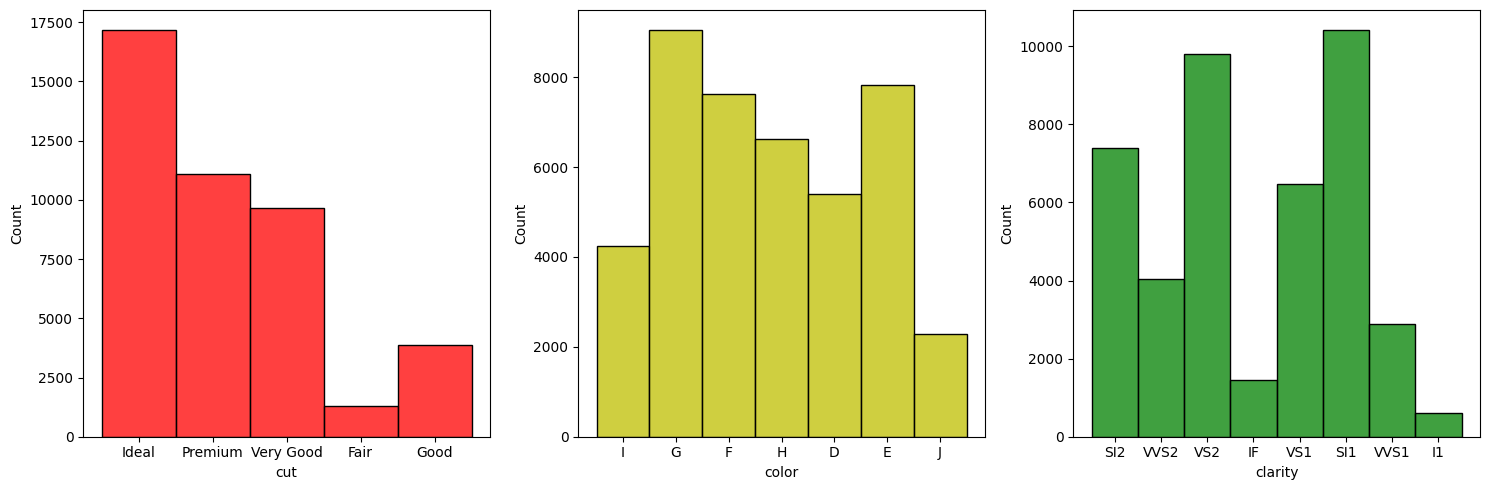

In [20]:
# Is used to create a histogram plot. A  graphical representation of the distribution of a dataset. 
# It organizes the data into bins and displays the frequency or count of data points falling into each bin.
fig, axes = plt.subplots(1,3, figsize=(15,5))
sns.histplot(train['cut'], ax=axes[0] ,color='r')
sns.histplot(train['color'], ax=axes[1] ,color='y')
sns.histplot(train['clarity'], ax=axes[2],color='g')
fig.tight_layout()

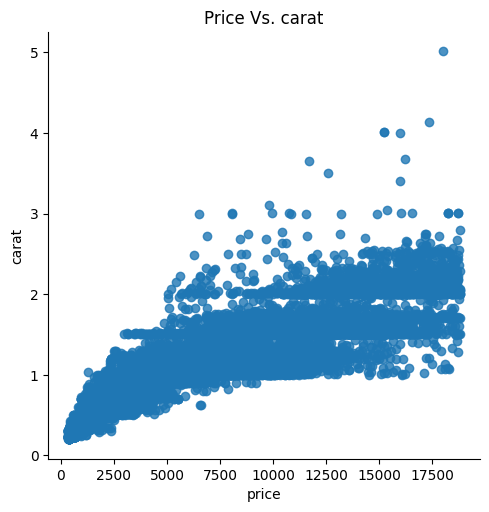

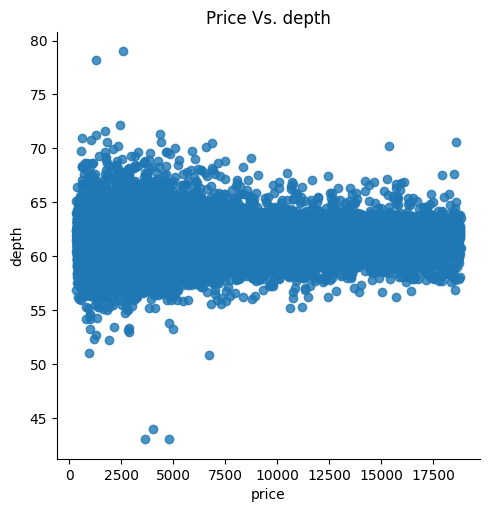

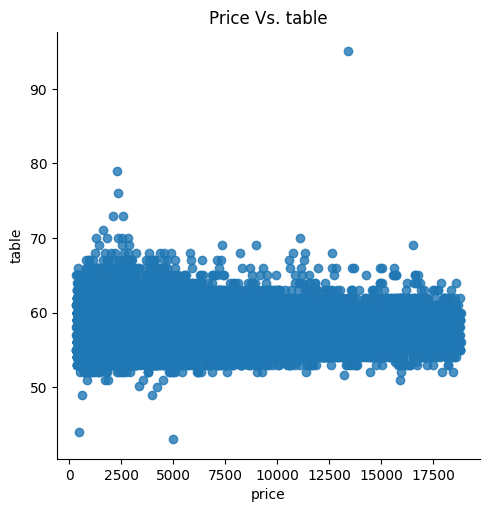

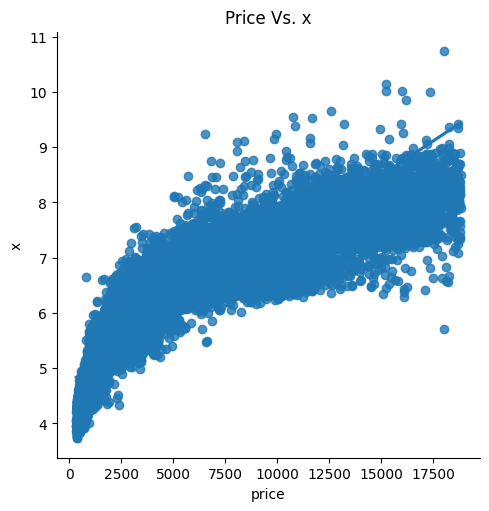

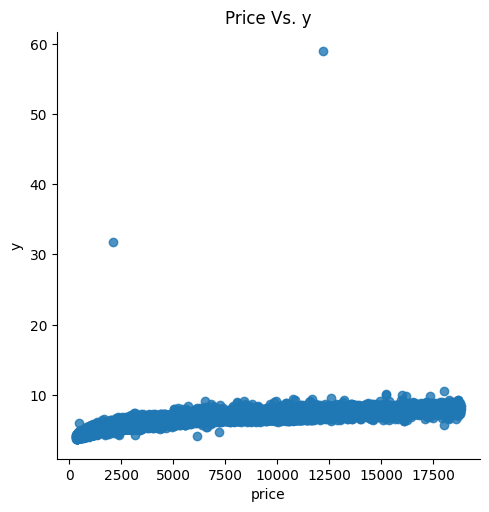

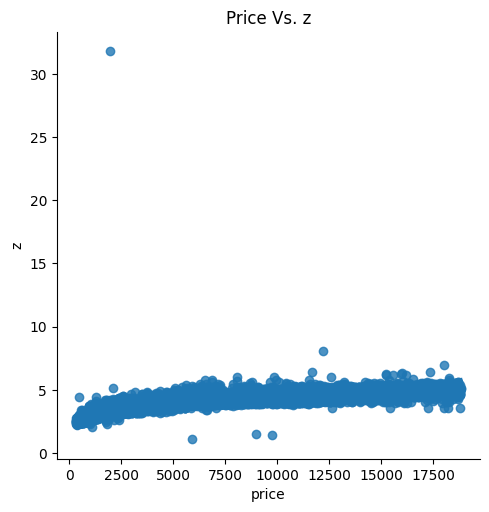

In [21]:
# The code generates scatter plots for each numerical column (except 'price') against the 'price' column. Each scatter plot visualizes the relationship between the 'price' column and 
# the corresponding column in terms of their distribution and any potential linear relationship. The title of each plot indicates the column being plotted against 'price'.
for col in numerical_col.columns:
    if col == "price":
        continue
    
    ax = sns.lmplot(data=train, x='price', y=col)
    plt.title(f"Price Vs. {col}")
    plt.show()

In [22]:
train_set = train[(train["depth"] < 75) & (train["depth"] > 45)]
train_set = train_set[(train["table"] < 80) & (train["table"] > 40)]
train_set = train_set[(train["x"]<15)]
train_set = train_set[(train["y"]<15)]
train_set = train_set[(train["z"]<15)&(train["z"]>2)]

<ipython-input-22-e6f32f0a3350>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_set = train_set[(train["table"] < 80) & (train["table"] > 40)]
<ipython-input-22-e6f32f0a3350>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_set = train_set[(train["x"]<15)]
<ipython-input-22-e6f32f0a3350>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_set = train_set[(train["y"]<15)]
<ipython-input-22-e6f32f0a3350>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_set = train_set[(train["z"]<15)&(train["z"]>2)]


 * Each line of code filters the 'train' DataFrame based on specific conditions for one or more columns and assigns the filtered DataFrame to the 'train_set' variable. This process helps create a new DataFrame, 'train_set', that contains rows satisfying the specified conditions for the respective columns. The resulting 'train_set' DataFrame will contain data points within the specified ranges or conditions for each column.

In [23]:
train_set.describe()

,carat,depth,table,price,x,y,z
count,43043.000000,43043.000000,43043.000000,43043.000000,43043.00000,43043.000000,43043.000000
mean,0.797657,61.747058,57.459050,3929.472620,5.73200,5.733583,3.539176
std,0.473156,1.422203,2.225651,3984.800888,1.11897,1.110995,0.690530
min,0.200000,50.800000,43.000000,326.000000,3.73000,3.680000,2.060000
25%,0.400000,61.000000,56.000000,948.000000,4.71000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.70000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5312.000000,6.54000,6.540000,4.040000
max,5.010000,72.200000,79.000000,18823.000000,10.74000,10.540000,6.980000


In [24]:
# splitting our data into categorical and numerical
categorical_col = train_set[['clarity', 'color', 'cut']]
numerical_col = train_set[['carat', 'depth', 'table', 'x', 'y', 'z', 'price']]

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>,
        <Axes: title={'center': 'z'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >, <Axes: >]],
      dtype=object)

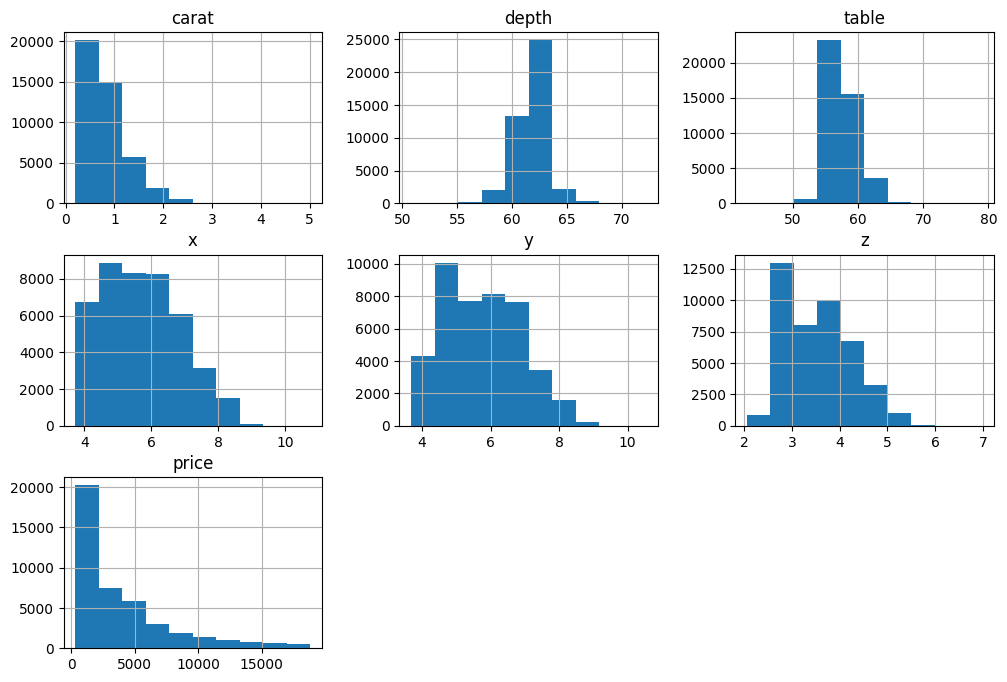

In [25]:
# After Handeling with Outlier
numerical_col.hist(figsize=(12, 8))

**Make correlation:**

To show the amount of correlated data.

In [26]:
# You can identify which columns have the weakest and strongest linear relationships with the 'price' column. 
# Columns with higher positive correlation coefficients indicate a stronger positive relationship with the 'price' column, 
# while columns with higher negative correlation coefficients indicate a stronger negative relationship with the 'price' column.
train_set.corr()['price'].sort_values()

<ipython-input-26-1890c46438ce>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_set.corr()['price'].sort_values()


depth   -0.012855
table    0.127663
z        0.882071
x        0.886952
y        0.888657
carat    0.921900
price    1.000000
Name: price, dtype: float64

<ipython-input-27-6b40dc98d1d8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_set.corr(),vmin=-1,vmax=1,cmap='Blues',annot=True)


<Axes: >

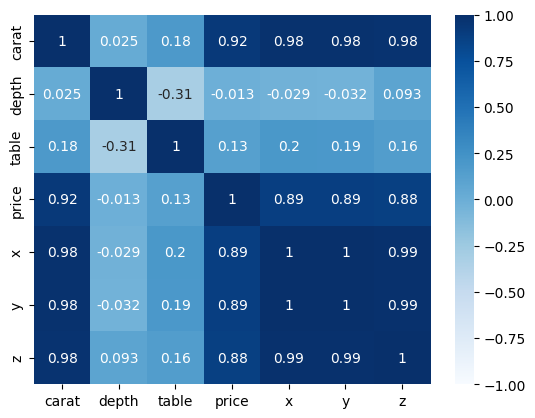

In [27]:
sns.heatmap(train_set.corr(),vmin=-1,vmax=1,cmap='Blues',annot=True)

**Correlation measures the strength and direction of the linear relationship between two variables.**

1. Carat has a strong positive correlation with price (0.92), which means that as carat weight increases, so does the price of the diamond.
2. Carat also has strong positive correlations with x, y, and z dimensions of the diamond, which is expected since a larger carat weight usually means a larger diamond.
3. Depth has a weak negative correlation with price (-0.01), which means that there is almost no relationship between the depth of the diamond and its price.
4. Table has a moderate positive correlation with price (0.13), which means that as the table percentage increases, the price of the diamond tends to increase as well.
5. X, Y, and Z dimensions have strong positive correlations with each other, as expected since they are all measures of the size of the diamond.


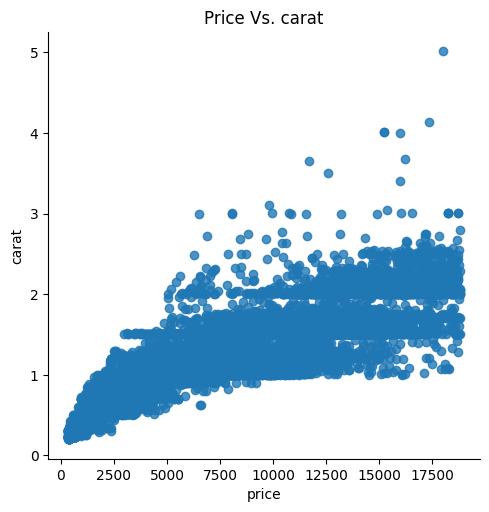

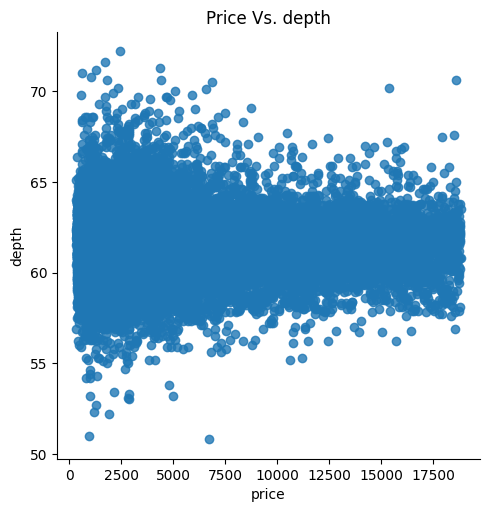

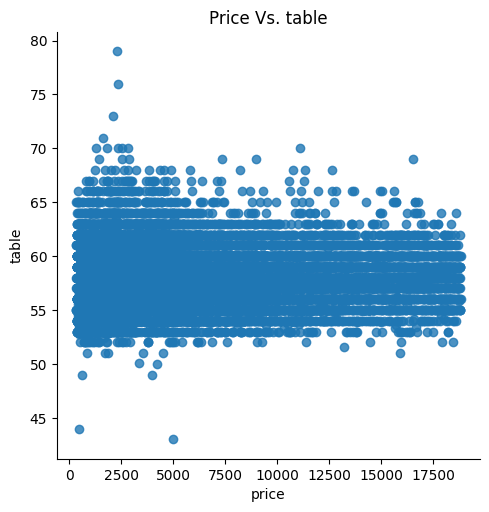

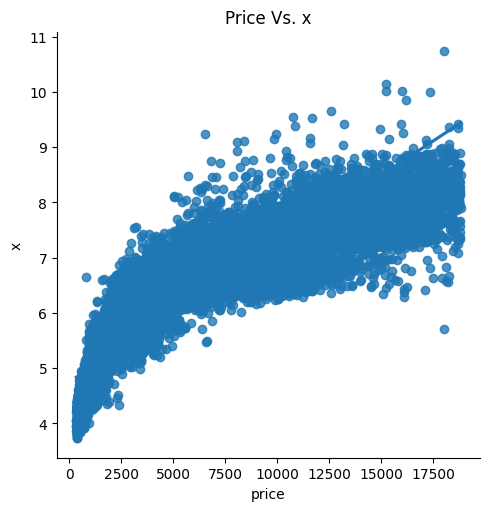

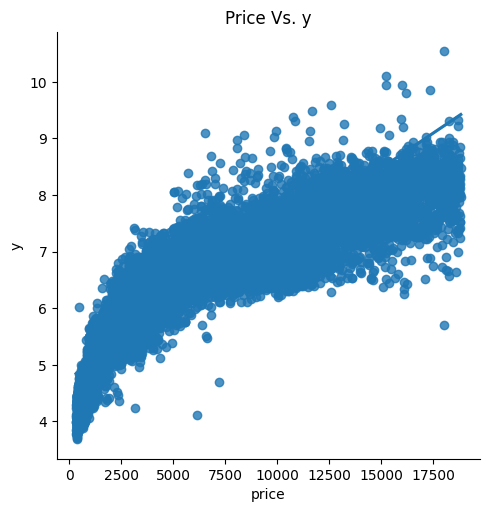

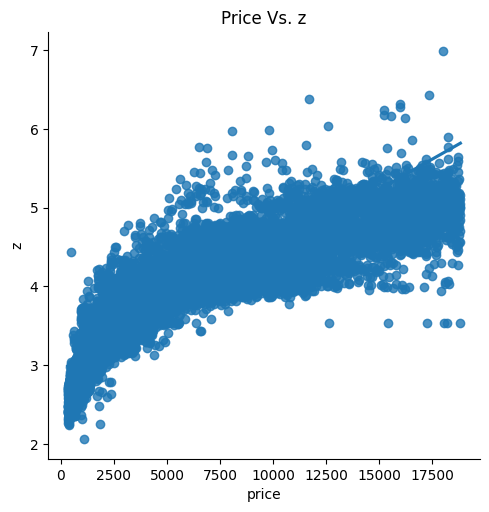

In [28]:
# After filters
for col in numerical_col.columns:
    if col == "price":
        continue
    
    ax = sns.lmplot(data=train_set, x='price', y=col)
    plt.title(f"Price Vs. {col}")
    plt.show()
  

Text(0.5, 1.0, 'Relationship between Carat and Price')

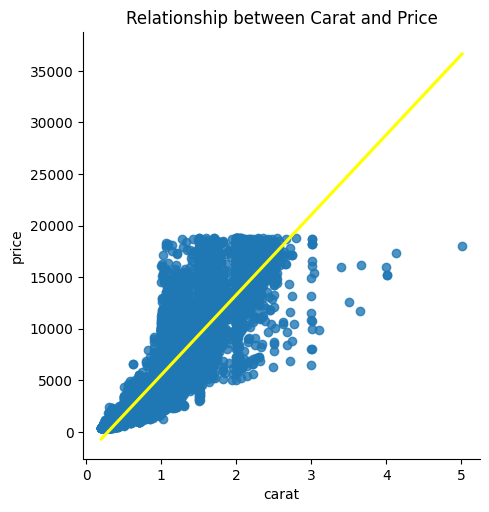

In [29]:
# Plot scatter plot with regression line
sns.lmplot(x='carat', y='price', data=train, line_kws={'color': 'yellow'})

# Set plot title
plt.title('Relationship between Carat and Price')

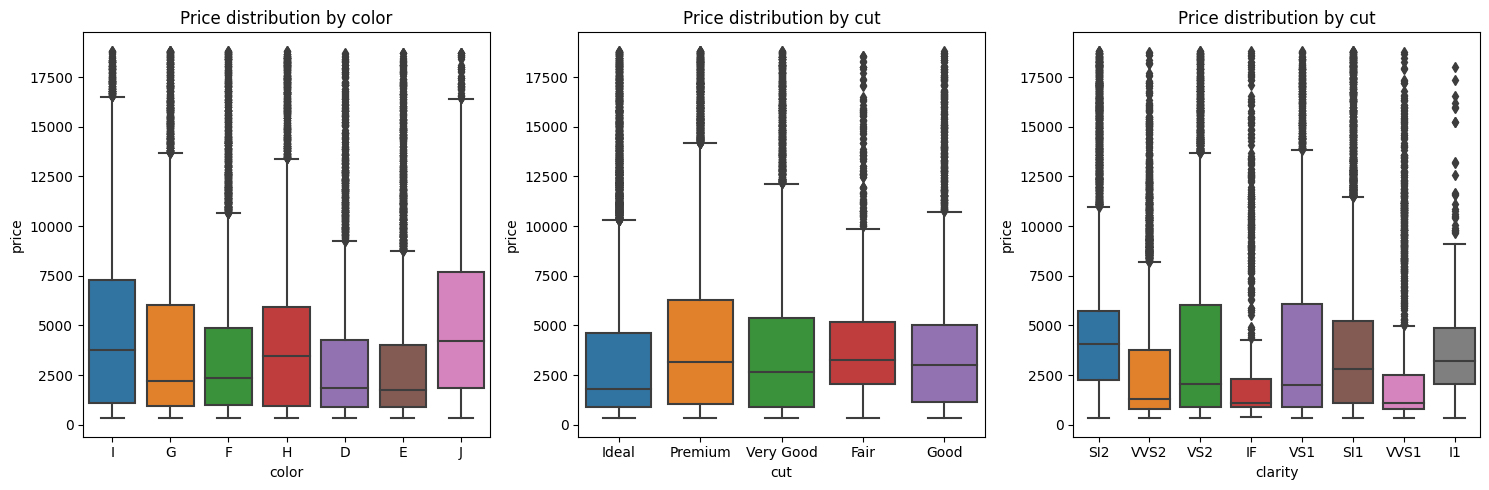

In [30]:
#from J (worst) to D (best)
fig, axes = plt.subplots(1,3, figsize=(15, 5))

# Create the boxplots for color and cut
sns.boxplot(x="color", y="price", ax=axes[0], data=train_set)
sns.boxplot(x="cut", y="price", ax=axes[1], data=train_set)
sns.boxplot(x="clarity", y="price", ax=axes[2], data=train_set)

# Set the titles for the subplots
axes[0].set_title("Price distribution by color")
axes[1].set_title("Price distribution by cut")
axes[2].set_title("Price distribution by cut")
# Adjust the layout
fig.tight_layout()

# Show the plot
plt.show()

#Features selection

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn import metrics
import math

In [32]:
# tegorical variables into numerical representations, allowing machine learning algorithms to process them. Each unique category is assigned a unique integer value. 
le = LabelEncoder()

for col in categorical_col.columns:
    train_set[col] = le.fit_transform(train_set[col])
    test[col] = le.fit_transform(test[col])

In [33]:
# The 'volume' column is created to represent the volume of each observation in the dataset. It is calculated by multiplying the dimensions ('x', 'y', and 'z') together. 
# By adding this column, the dataset now includes the calculated volume information, which might be useful for analyzing or modeling purposes.
train_set['volume']=(train_set.x*train_set.y*train_set.z)
test['volume']=(test.x*test.y*test.z)
train_set.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,1.06,2,5,3,61.8,57.0,4270,6.57,6.60,4.07,176.483340
1,1.51,3,3,7,60.9,58.0,15164,7.38,7.42,4.51,246.965796
2,0.32,2,2,5,61.3,56.0,828,4.43,4.41,2.71,52.943373
3,0.53,2,3,5,61.2,56.0,1577,5.19,5.22,3.19,86.422842
4,0.70,3,4,7,61.0,57.0,2596,5.76,5.72,3.50,115.315200


In [34]:
# Drop columns (x,y,z) from train_set
# Drop columns (id,x,y,z) from test
# and save column id in variable ids
train_set.drop(['x','y','z'],axis=1,inplace=True)
ids=test['Id']
test.drop(['Id','x','y','z'],axis=1,inplace=True)

#Creating The Model

In [35]:
X=train_set.drop(columns='price')
y= train_set['price']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

###Liner Regression

In [37]:
lr=LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred = lr.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 936.3185091665213
MSE is 1936810.1208167241
R2 score is 0.8792286135500597
RMSE score is 1391.6932567260374


###Random Forest

In [39]:
rf=RandomForestRegressor()

rf.fit(X_train,y_train)

RandomForestRegressor()

In [40]:
y_pred = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 291.49852640232535
MSE is 330803.57108186506
R2 score is 0.9793724715227627
RMSE score is 575.1552582406467


###XGBoost Regression

In [41]:
xgb=XGBRegressor()

xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [42]:
y_pred = xgb.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 290.98127850268776
MSE is 321269.64302280446
R2 score is 0.9799669674403705
RMSE score is 566.8065305047256


In [43]:
# By separating the data into x_train (input features) and y_train (target variable), the code prepares the training data for supervised machine learning tasks. 
# The input features are stored in x_train, and the corresponding target values are stored in y_train. 
# This allows the machine learning model to learn the relationship between the input features and the target variable during the training process.
x_train = train_set.drop(columns='price')
y_train = train_set['price']

###Creating The Model by Pipeline

In [44]:
pipeline_lr = Pipeline([("scalar1", MinMaxScaler()),
                     ("lr", LinearRegression())])

pipeline_rf=Pipeline([("scalar2", MinMaxScaler()),
                     ("rf", RandomForestRegressor(n_estimators=400,
                                  max_features='sqrt',))])

pipeline_xgb=Pipeline([("scalar3", MinMaxScaler()),
                     ("xgb", XGBRegressor(learning_rate=0.05, max_depth=7, n_estimators=500, nthread=1,
             objective='reg:squarederror'))])


pipelines = [pipeline_lr, pipeline_rf,pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipeline_dict = {0: "LinearRegression",1: "RandomForest",2: "XGBRegressor"}

* Three pipelines are created using the Pipeline class from scikit-learn. Each pipeline consists of two steps: a scaler for feature scaling and a specific regression model.

* The first pipeline, pipeline_lr, applies the MinMaxScaler to perform feature scaling and then uses LinearRegression as the regression model.

* The second pipeline, pipeline_rf, applies the MinMaxScaler and uses RandomForestRegressor as the regression model. It specifies the number of estimators as 400 and the max_features as 'sqrt'.

* The third pipeline, pipeline_xgb, applies the MinMaxScaler and uses XGBRegressor (from the XGBoost library) as the regression model. It specifies various hyperparameters such as learning_rate, max_depth, n_estimators, nthread, and objective.

* The pipelines are stored in a list called pipelines for easier iteration and management.

* The pipeline_dict dictionary is created to map the indices of the pipelines to their respective names. This provides a convenient way to reference the pipelines by their index later in the code.

In [45]:
# Fit the pipelines
for i, pipe in enumerate(pipelines):
    # fitting our data
    pipe.fit(x_train, y_train)

    # getting the name of our model
    model_name = pipeline_dict[i]

    print("{} -> score: {}".format(model_name, pipe.score(x_train, y_train)))

LinearRegression -> score: 0.8819670833419792
RandomForest -> score: 0.9969920015188417
XGBRegressor -> score: 0.9919320940022391


* By looping through the pipelines, fitting them to the training data, and evaluating their performance, this code provides an overview of how well each model performs on the training data. The score can help assess the models' training fit and provide a basis for comparison among the different pipelines.

In [46]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, x_train, y_train, cv=10)
    cv_results_rms.append(cv_score)
    print("{}: {}".format(pipeline_dict[i], cv_score.mean()))

LinearRegression: 0.8816722129646919
RandomForest: 0.9775736131199686
XGBRegressor: 0.9820247557408679


* By performing cross-validation and calculating the mean score for each model, this code provides a measure of the models' performance on the training data that is more robust than a single training score. It helps assess the models' generalization ability and provides insights into their expected performance on unseen data.

### Project Submission

In [47]:
#Predict the response for test dataset
predict= pipeline_xgb.predict(test)

In [48]:
# Creates a submission file in CSV format containing the predicted prices along with their corresponding IDs. The file can be used for submitting predictions.
submission = pd.DataFrame({"Id":ids , "price": predict})
submission.to_csv("submissions.csv", index=False)

submission

,Id,price
0,1,820.419250
1,2,2918.260742
2,3,836.446106
3,4,2807.116943
4,5,1133.734009
...,...,...
10783,10784,1703.498657
10784,10785,6786.791992
10785,10786,4394.083984
10786,10787,4710.319824


In [49]:
submission.describe()

,Id,price
count,10788.000000,10788.000000
mean,5394.500000,3950.755371
std,3114.371686,3976.667480
min,1.000000,251.241943
25%,2697.750000,926.383057
50%,5394.500000,2425.033936
75%,8091.250000,5343.266602
max,10788.000000,18776.166016


# Thanks you 🌻
---



---

**Presented By::**

**Muna Aletaywi**
